In [1]:
import os  
import torch

In [2]:
%cd ../../repos/yolov7/

/home/galois/Documents/galois2024/ATU-VisionVehicle/repos/yolov7


/home/galois/Documents/galois2024/ATU-VisionVehicle/.env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
!ls

car.png  detect.py   inference	 __pycache__	   scripts	 train.py
cfg	 export.py   LICENSE.md  README.md	   test.py	 utils
data	 figure      models	 requirements.txt  tools
deploy	 hubconf.py  paper	 runs		   train_aux.py


In [4]:
from  hubconf import custom

In [5]:
model = custom(path_or_model='../best.pt')


                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 2, None, 1, LeakyReLU(negative_slope=0.1)]
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2, None, 1, LeakyReLU(negative_slope=0.1)]
  2                -1  1      2112  models.common.Conv                      [64, 32, 1, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  3                -2  1      2112  models.common.Conv                      [64, 32, 1, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  4                -1  1      9280  models.common.Conv                      [32, 32, 3, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  5                -1  1      9280  models.common.Conv                      [32, 32, 3, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  6  [-1, -2, -3, -4]  1         0  models.common.Concat                    [1]                           


Adding autoShape... 


In [6]:
!ls

car.png  detect.py   inference	 __pycache__	   scripts	 train.py
cfg	 export.py   LICENSE.md  README.md	   test.py	 utils
data	 figure      models	 requirements.txt  tools
deploy	 hubconf.py  paper	 runs		   train_aux.py


In [57]:
#model = custom(path_or_model='yolov7.pt')  # custom example
# model = create(name='yolov7', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example

# Verify inference
import numpy as np
import cv2
from PIL import Image



In [58]:
print(dir(results))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'display', 'files', 'imgs', 'n', 'names', 'pandas', 'pred', 'print', 'render', 's', 'save', 'show', 't', 'tolist', 'xywh', 'xywhn', 'xyxy', 'xyxyn']


In [77]:
#imgs = [np.zeros((640, 480, 3))]
imgs = cv2.imread('./car.png')
results = model(imgs)  # batched inference
#results.print()
#results.save()
xywh = results.xywh[0].numpy()
# Define color map for different classes
color_map = {
    0: (255, 0, 0),    # Red
    1: (0, 255, 0),    # Green
    2: (0, 0, 255),    # Blue
    7: (255, 255, 0),  # Cyan
    8: (255, 0, 255)   # Magenta
}
clasess = {
    0: "camion",    # Red
    1: "gaa",    # Green
    2: "asdf",    # Blue
    7: "aefe",  # Cyan
    8: "yrg"   # Magenta
}

# Function to draw bounding boxes with different colors based on class
def draw_boxes(image, boxes):
    for box in boxes:
        x, y, w, h, conf, cls = box
        x1 = int(x - w / 2)
        y1 = int(y - h / 2)
        x2 = int(x + w / 2)
        y2 = int(y + h / 2)
        color = color_map.get(int(cls), (0, 255, 255))  # Default to yellow if class not in color_map
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        label = f'{clasess.get(int(cls), "desconocido")}, {conf:.2f}'
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Draw boxes on the image
draw_boxes(imgs, xywh)

In [78]:
color_map.get(int(3), (0, 255, 255)) 

(0, 255, 255)

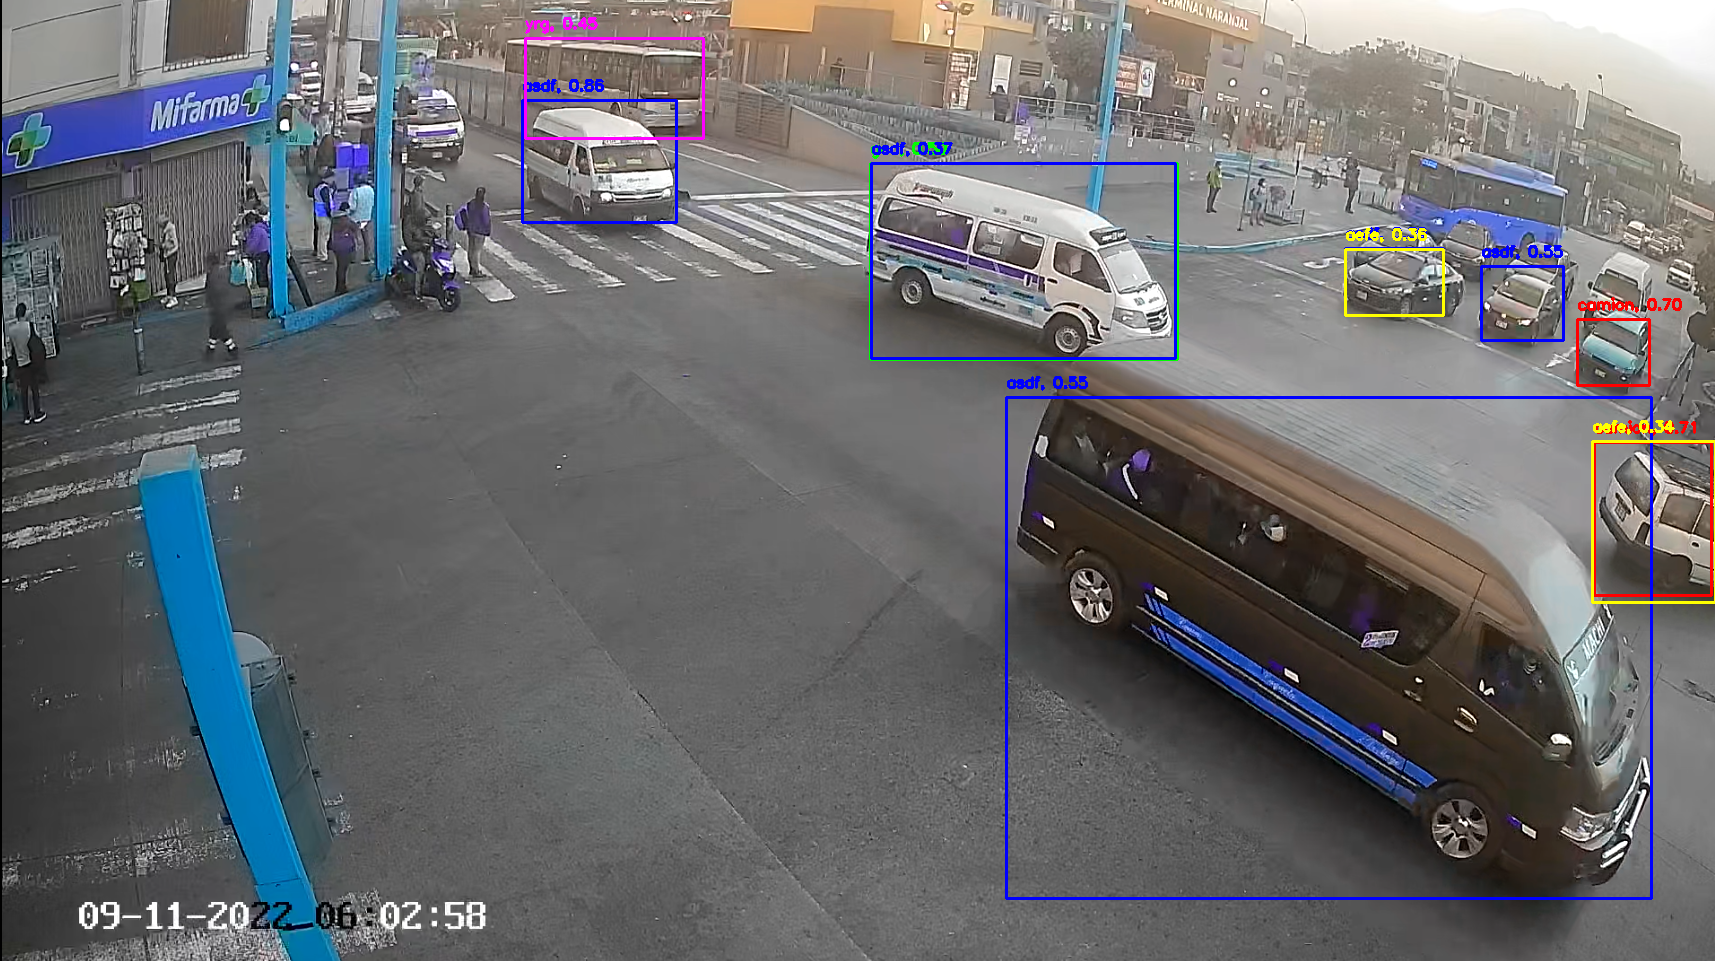

In [79]:
display(Image.fromarray(imgs))

In [20]:
import sys
sys.path.append('./yolov7')
import cv2
from pathlib import Path
import torch
import numpy as np
# Verify inference
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display


from yolov7.models.yolo import Model
from yolov7.utils.general import check_requirements, set_logging
from yolov7.utils.google_utils import attempt_download
from yolov7.utils.torch_utils import select_device

## Load model

In [2]:
## Load model
dependencies = ['torch', 'yaml']
check_requirements(Path("./yolov7").parent / 'requirements.txt', exclude=('pycocotools', 'thop'))
set_logging()

def custom(path_or_model='path/to/model.pt', autoshape=True):
    """custom mode

    Arguments (3 options):
        path_or_model (str): 'path/to/model.pt'
        path_or_model (dict): torch.load('path/to/model.pt')
        path_or_model (nn.Module): torch.load('path/to/model.pt')['model']

    Returns:
        pytorch model
    """
    model = torch.load(path_or_model, map_location=torch.device('cpu')) if isinstance(path_or_model, str) else path_or_model  # load checkpoint

    if isinstance(model, dict):
        model = model['ema' if model.get('ema') else 'model']  # load model

    hub_model = Model(model.yaml).to(next(model.parameters()).device)  # create
    hub_model.load_state_dict(model.float().state_dict())  # load state_dict
    hub_model.names = model.names  # class names
    if autoshape:
        hub_model = hub_model.autoshape()  # for file/URI/PIL/cv2/np inputs and NMS
    device = select_device('0' if torch.cuda.is_available() else 'cpu')  # default to GPU if available
    return hub_model.to(device)

model = custom(path_or_model='./yolov7/best.pt')  # custom example
#model = create(name='./yolov7/best.pt', pretrained=True, channels=3, classes=80, autoshape=True)  # pretrained example


                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 2, None, 1, LeakyReLU(negative_slope=0.1)]
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2, None, 1, LeakyReLU(negative_slope=0.1)]
  2                -1  1      2112  models.common.Conv                      [64, 32, 1, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  3                -2  1      2112  models.common.Conv                      [64, 32, 1, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  4                -1  1      9280  models.common.Conv                      [32, 32, 3, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  5                -1  1      9280  models.common.Conv                      [32, 32, 3, 1, None, 1, LeakyReLU(negative_slope=0.1)]
  6  [-1, -2, -3, -4]  1         0  models.common.Concat                    [1]                           


Adding autoShape... 


## Test on img

In [48]:
img =  cv2.imread("./yolov7/car.png")
results = model(img)  # batched inference
results.save()

Saved image0.jpg to runs/hub/exp10


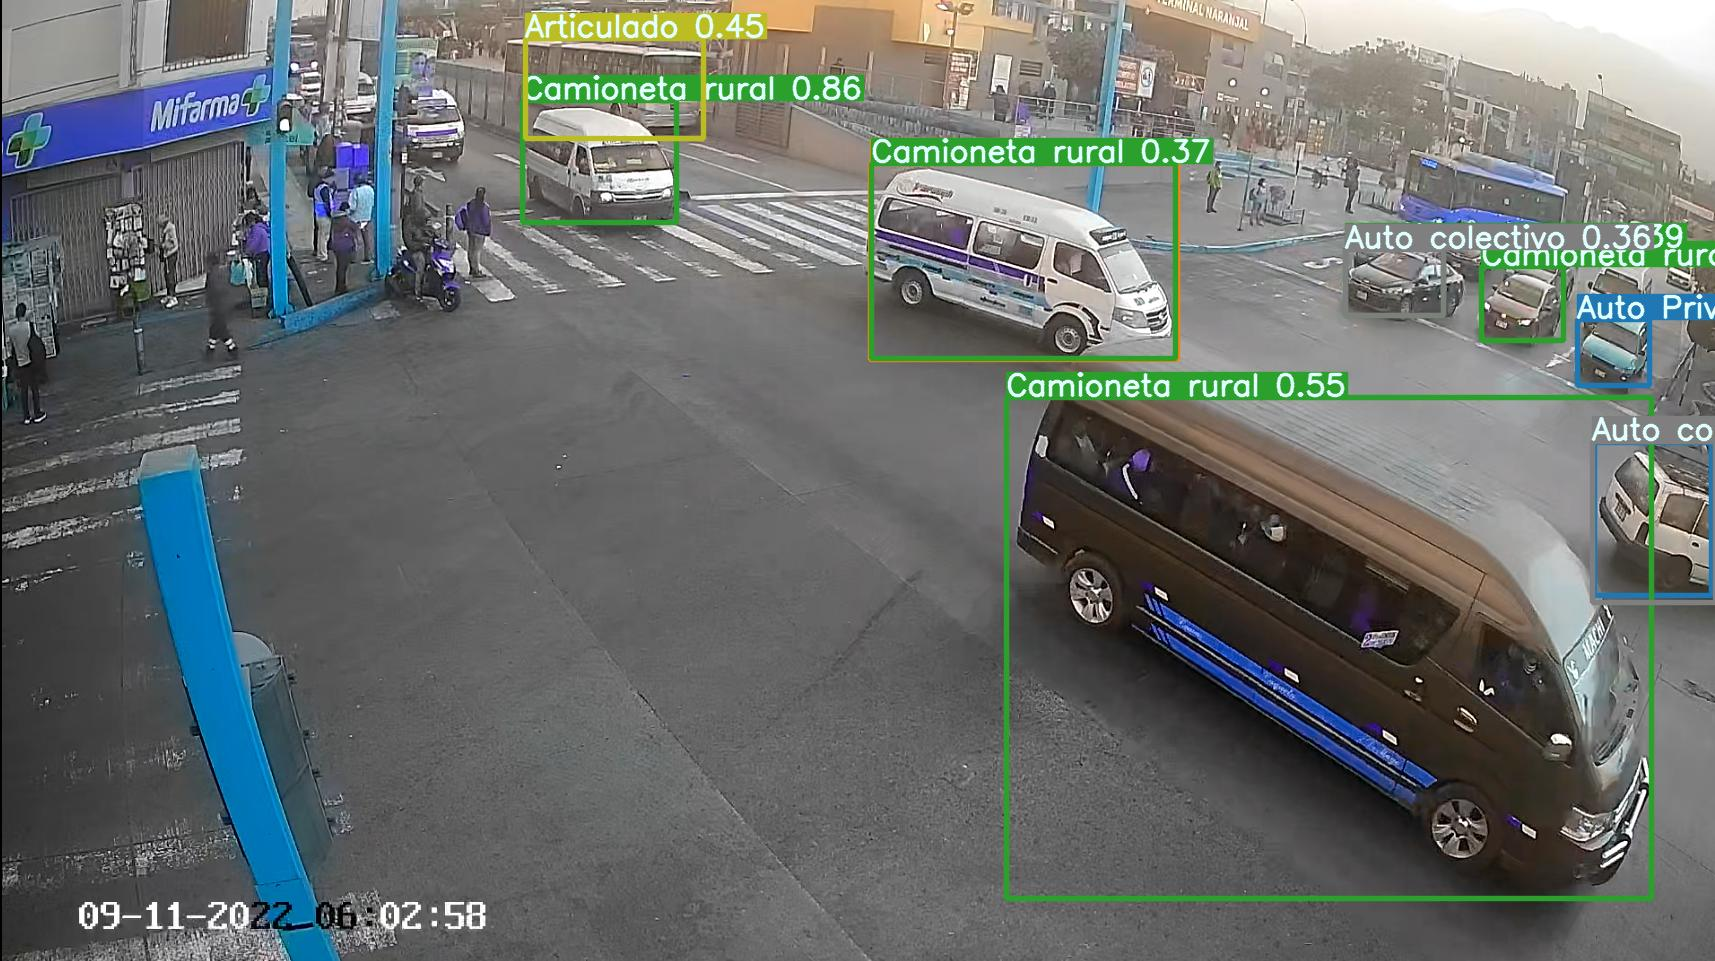

In [49]:
img = cv2.imread("./runs/hub/exp9/image0.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(img))


In [ ]:
from ultralytics import YOLO
model_2 = YOLO(f'./yolov8n.pt')
#results_2 = model_2("./yolov7/car.png")
#results_2[0].boxes.xyxy
#print(dir(results[0].probs))
#detect = sv.Detections.from_ultralytics(results_2[0])
#https://supervision.roboflow.com/detection/core/
#https://supervision.roboflow.com/trackers/
#https://www.youtube.com/watch?v=OS5qI9YBkfk
#https://roboflow.com/how-to-track/yolov8
#https://www.youtube.com/watch?v=OS5qI9YBkfk&t=1011s
#https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Results
#https://www.youtube.com/watch?v=oDALtKbprHg
#https://supervision.roboflow.com/detection/core/

## Tacking on video

In [ ]:
import supervision as sv
tracker = sv.ByteTrack()
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

def callback(frame: np.ndarray, index: int) -> np.ndarray:
    results = model(frame)
    #print(results.xyxy[0].numpy()[:,:4])
    #detections = sv.Detections.from_ultralytics(results_2)
    detections = sv.Detections(xyxy=results.xyxy[0].numpy()[:,:4],
                               confidence=results.xyxy[0].numpy()[:,4],
                               class_id=results.xyxy[0].numpy()[:,-1].astype(int))
    #print(detections)
    detections = tracker.update_with_detections(detections)
    
    labels = [f"#{tracker_id}" for tracker_id in detections.tracker_id]

    annotated_frame = bounding_box_annotator.annotate(
        scene=frame.copy(), detections=detections)
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame, detections=detections, labels=labels)
    return annotated_frame

In [ ]:
sv.process_video(
    source_path="./yolov7/video1_test2.mp4",
    target_path="./yolov7/video1_test2(copy).mp4",
    callback=callback
)

In [ ]:
from pynput.mouse import Button, Controller
import time

mouse = Controller()

while True:
    mouse.click(Button.left, 1)
    time.sleep(30)